In [1]:
from __future__ import print_function
import numpy as np

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import SimpleITK as sitk
import csv
import pandas as pd

from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
data_dir = '../data/luna16/'
data_file = 'class1_diff_xyz.csv'
with open \
  (data_dir + data_file, 'r') as f:
        meta_df = pd.read_csv(f)
meta_df.shape

(1557, 4)

In [3]:
Vx = meta_df.diff_x
Vy = meta_df.diff_y
Vz = meta_df.diff_z

In [4]:
print ( "Minimum x : {}, maximum x : {}".format(Vx.min(), Vx.max() ) )
print ( "Minimum y : {}, maximum y : {}".format(Vy.min(), Vy.max() ) )
print ( "Minimum z : {}, maximum z : {}".format(Vz.min(), Vz.max() ) )

Minimum x : 9.654530000000001, maximum x : 359.6677112
Minimum y : 52.58518555, maximum y : 346.498396
Minimum z : 29.385016999999998, maximum z : 353.01651499999997


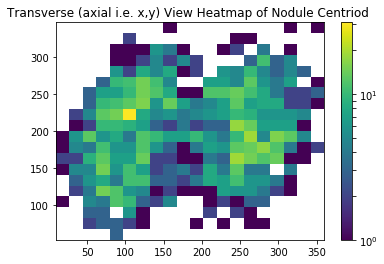

In [5]:
plt.hist2d(Vx, Vy, bins = 20, norm=LogNorm())
plt.title("Transverse (axial i.e. x,y) View Heatmap of Nodule Centriod ")
plt.colorbar()
plt.show()

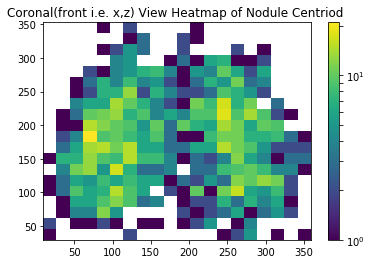

In [6]:
plt.hist2d(Vx, Vz, bins=20, norm=LogNorm())
plt.title("Coronal(front i.e. x,z) View Heatmap of Nodule Centriod ")
plt.colorbar()
plt.show()

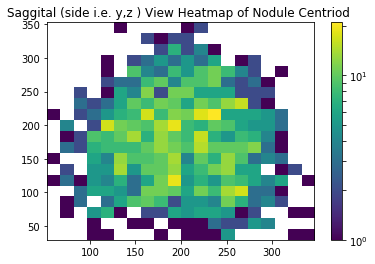

In [7]:
plt.hist2d(Vy, Vz, bins=20, norm=LogNorm())
plt.title("Saggital (side i.e. y,z ) View Heatmap of Nodule Centriod ")
plt.colorbar()
plt.show()

#### For later use...per Prof. Voytek's 

In [8]:
data_dir = '../data/luna16/'
img_filename = '1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437.mhd'
itk_img = sitk.ReadImage(data_dir + img_filename) 

# img_filename1 = '1.3.6.1.4.1.14519.5.2.1.6279.6001.278660284797073139172446973682.mhd'
# itk_img1 = sitk.ReadImage(data_dir + img_filename1) 

In [9]:
# scan_df = class1_df[ (class1_df.seriesuid == '1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437') ]
# scan_df

In [10]:
img_np_array = sitk.GetArrayFromImage(itk_img)
#img_np_array.shape

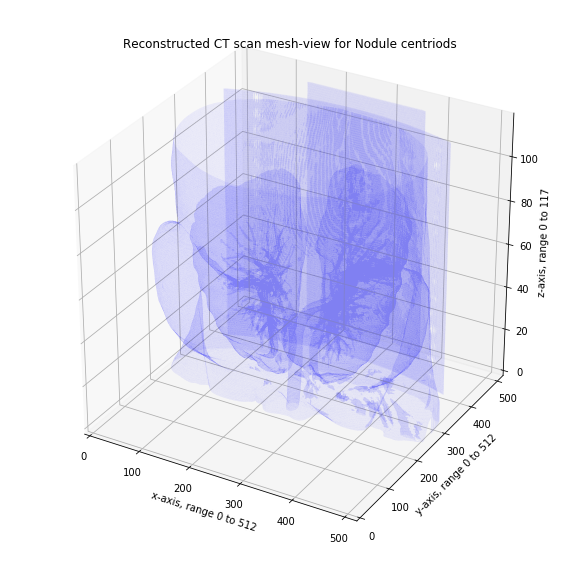

In [11]:
def plot_lung_mesh(image, threshold=-200):
    p1 = img_np_array.transpose(2,1,0)
    p1 = p1[:,:,::-1]
    verts, faces, normals, values = measure.marching_cubes_lewiner(p1, -200)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)

    ax.add_collection3d(mesh)

    ax.set_xlabel("x-axis, range 0 to 512")
    ax.set_ylabel("y-axis, range 0 to 512")
    ax.set_zlabel("z-axis, range 0 to 117")
    ax.set_xlim(0, p1.shape[0])
    ax.set_ylim(0, p1.shape[1])
    ax.set_zlim(0, p1.shape[2])

    plt.title("Reconstructed CT scan mesh-view for Nodule centriods")
    plt.show()

plot_lung_mesh(img_np_array, -200);
#%timeit plot_lung_mesh(img_np_array, -200);

#### Todo - To parallize later from HDFS data sets (AL)

In [ ]:
# from joblib import Parallel, delayed
# def joblib_loop():
#     Parallel(n_jobs=4)(delayed(plot_3d)(i) for i in images)

# %timeit joblib_loop()

# for i in range(0, len(df)):
#     print df.iloc[i]['c1'], df.iloc[i]['c2']